## Titanic survival prediction with DecisionTreeClassifier

### Step 1. 導入所需要的套件

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

### Step 2. 導入數據集

In [2]:
data = pd.read_csv(r"D:\TGI102_AI_BootCamp\Machine_learning\Machine_Learning_Tsai\DataAndCode\datasets\Titanic\data.csv")

### Step 3. 查看數據集資訊

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.head()  # 預設顯示前5行

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 4. 數據預處理
(包含缺失值處理(剔除, 補值), 文字轉數字...)

In [6]:
# 篩選特徵, 剔除缺失值太多或和生存率無關(domain knowhow)的特徵
# data = data.drop(["Cabin", "Name", "Ticket"], axis=1)
data.drop(["Cabin", "Name", "Ticket"], inplace=True, axis=1)

In [7]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [8]:
# 處理缺失值
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [10]:
# 剔除掉Embarked缺失那兩筆資料(剔除該缺失的兩筆對數據集整體筆數影響不大, 所以可以剔除)
data = data.dropna()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [12]:
# 將Embarked的資料由文字轉數字, Embarked的資料彼此之間獨立沒有大小關係, 所以可以直接轉
data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [14]:
labels = data["Embarked"].unique().tolist()
print(labels)
print(labels.index("S"))

['S', 'C', 'Q']
0


In [15]:
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))

C:\Users\USER\anaconda3\envs\py37sklearn\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,0


In [17]:
data["Sex"] == "male"

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: Sex, Length: 889, dtype: bool

In [18]:
(data["Sex"] == "male").astype("int")

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int32

In [19]:
data.loc[:, "Sex"] = (data.loc[:, "Sex"] == "male").astype("int")

C:\Users\USER\anaconda3\envs\py37sklearn\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [20]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


### Step 5. 切分訓練集和資料集

In [21]:
data.columns != "Survived"

array([ True, False,  True,  True,  True,  True,  True,  True,  True])

In [22]:
x = data.iloc[:, data.columns != "Survived"]

In [23]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,0
1,2,1,0,38.000000,1,0,71.2833,1
2,3,3,0,26.000000,0,0,7.9250,0
3,4,1,0,35.000000,1,0,53.1000,0
4,5,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,0
887,888,1,0,19.000000,0,0,30.0000,0
888,889,3,0,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


In [24]:
y = data.iloc[:, data.columns == "Survived"]

In [25]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [27]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3)

In [29]:
Xtrain.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
87,88,3,1,29.699118,0,0,8.0500,0
483,484,3,0,63.000000,0,0,9.5875,0
201,202,3,1,29.699118,8,2,69.5500,0
785,786,3,1,25.000000,0,0,7.2500,0
426,427,2,0,28.000000,1,0,26.0000,0


In [34]:
# 將索引照順序排列, 之後若要loc資料較方便
print(Xtrain.shape)

for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

(622, 8)


In [35]:
Xtrain.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,88,3,1,29.699118,0,0,8.0500,0
1,484,3,0,63.000000,0,0,9.5875,0
2,202,3,1,29.699118,8,2,69.5500,0
3,786,3,1,25.000000,0,0,7.2500,0
4,427,2,0,28.000000,1,0,26.0000,0


### 建立決策樹模型

In [36]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)

score

0.7528089887640449

### 使用交叉驗證(cross_val_score)評估模型

In [39]:
clf = DecisionTreeClassifier(random_state=25)
score = cross_val_score(clf, x, y, cv=10).mean()

score

0.7469611848825333

### 調整max_depth看train/test accuracy評估模型

Max train accuracy: 0.9501607717041801
Max test accuracy: 0.8166624106230849


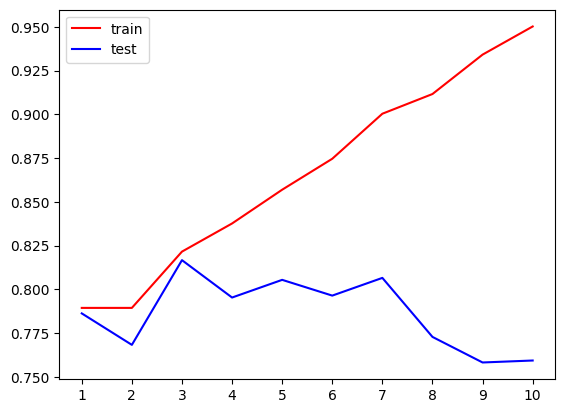

In [45]:
tr = []
te = []

for i in range(10):
    clf = DecisionTreeClassifier(random_state=25,
                                 max_depth=i+1,
                                 criterion="entropy"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain, Ytrain)
    score_te = cross_val_score(clf, x, y, cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)

print("Max train accuracy:", max(tr))
print("Max test accuracy:", max(te))

plt.plot(range(1, 11), tr, color="red", label="train")
plt.plot(range(1, 11), te, color="blue", label="test")
plt.xticks(range(1, 11))
plt.legend()
plt.show()

### 使用grid search來尋找最佳參數組合
grid search 同時調整多個參數來尋找最佳參數, 同時做交叉驗證, 注意: 耗時!

In [46]:
import numpy as np

gini_thresholds = np.linspace(0, 0.5, 50)
# entropy_thresholds = np.linspace(0, 1, 50)

In [49]:
# parameters為多個參數和這些參數對應的, 使用者希望grid search幫助搜索的範圍
parameters = {"criterion": ("gini", "entropy"), 
              "splitter": ("best", "random"), 
              "max_depth": [*range(1, 10)],
              "min_samples_leaf": [*range(1, 50, 5)],
              "min_impurity_decrease": [*np.linspace(0, 0.5, 50)]
}


clf = DecisionTreeClassifier(random_state=25)

GS = GridSearchCV(clf, parameters, cv=10)
GS = GS.fit(Xtrain, Ytrain)

In [50]:
# best_params_, 返回最佳組合
GS.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_impurity_decrease': 0.01020408163265306,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [51]:
# best_score_, 網格搜索後的模型評判標準
GS.best_score_

0.8182539682539682

In [54]:
clf = DecisionTreeClassifier(random_state=25, 
                             criterion="gini",
                             max_depth=3,
                             min_impurity_decrease=0.01020408163265306,
                             min_samples_leaf=1,
                             splitter="best"
                             )

clf.fit(Xtrain, Ytrain)
s_train = clf.score(Xtrain, Ytrain)
s_test = clf.score(Xtest, Ytest)

print(s_train)
print(s_test)

0.8215434083601286
0.8052434456928839
